<a href="https://colab.research.google.com/github/Reece323/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Cody_Reece2_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####
import pandas as pd

In [0]:
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [0]:
iowa = pd.read_csv(source_url)

In [0]:
#First few rows
iowa.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
508,509,70,RM,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,9,1928,2005,Gambrel,CompShg,MetalSd,MetalSd,None,0.0,TA,Ex,BrkTil,TA,TA,No,Rec,141,Unf,0,548,689,GasA,...,Y,SBrkr,689,689,0,1378,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Detchd,1928.0,Unf,2,360,TA,TA,N,0,0,116,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,161000


In [0]:
iowa.shape

(1460, 81)

In [0]:
iowa[['YearBuilt', 'MSSubClass']].describe()

,YearBuilt,MSSubClass
count,1460.000000,1460.000000
mean,1971.267808,56.897260
std,30.202904,42.300571
min,1872.000000,20.000000
25%,1954.000000,20.000000
50%,1973.000000,50.000000
75%,2000.000000,70.000000
max,2010.000000,190.000000


In [0]:
pd.set_option('display.max_rows', 100)
iowa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [0]:
#PREFERRED METHOD!!!
#Data type of SPECIFIC column
iowa['BedroomAbvGr'].dtype

dtype('int64')

In [0]:
#Another way for Data type of SPECIFIC column
#NOT RECOMMENDED
iowa.Fireplaces.sample(4)

799    2
334    2
51     1
846    1
Name: Fireplaces, dtype: int64

In [0]:
# iowa['BedroomAbvGr'].head(10)
iowa['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [0]:
###MISSING VALUES SHOW UP AS FLOATS! (NaN)

iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [0]:
#NaN is the most common value
#NUMPY is most helpful for this
import numpy as np
np.nan

nan

In [0]:
type(np.nan)

float

In [0]:
iowa['LotFrontage'].isnull().sum()

259

In [0]:
#How big before dropping NaN
iowa.shape

(1460, 81)

In [0]:
### DROPS MISSING DATA (NaN)
iowa['LotFrontage'].dropna(inplace=True)

In [0]:
iowa.shape

(1460, 81)

In [0]:
iowa['LotFrontage'].isnull().sum()

0

#Making Features
##TotalBsmtSF
##1stFlrSF
##2ndFlrSF
##SalePrice1

In [0]:
#Smaller dataframe.. Few specific columns
#by passing a list of column headers inside 
small=iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
1361,1530,1530,0,260000
1123,698,698,0,118000
141,1734,1734,0,260000


In [0]:
#Add all square footage to get a single square footage column for the entire dataset
small['TotalSF'] = small['TotalBsmtSF'] + small['1stFlrSF'] + small['2ndFlrSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [0]:
small['PricePerSf'] = small['SalePrice'] / small['TotalSF']
small.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSf
740,264,768,664,132000,1696,77.830189
979,1121,1121,0,139000,2242,61.998216
260,1362,1382,0,176000,2744,64.139942
369,1063,1287,0,162000,2350,68.936170
110,994,1216,639,136900,2849,48.051948


In [0]:
## Crosstab
#Categorical variables
iowa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(5)

,LotShape,Alley,Street,SaleCondition
498,Reg,NaN,Pave,Normal
556,IR1,NaN,Pave,Normal
273,Reg,NaN,Pave,Normal
132,Reg,NaN,Pave,Normal
1257,Reg,NaN,Pave,Normal


In [0]:
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [0]:
##Prefered only for BINARY!!!!

iowa['NormalCondition'] = np.where(iowa['SaleCondition'] == 'Normal', 'yes', "no")
iowa['NormalCondition'].value_counts()

yes    1198
no      262
Name: NormalCondition, dtype: int64

In [0]:
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
#Trim from 4 to 3
iowa['LotShape3'] = iowa['LotShape'].map({'Reg' : 'Regular', 'IR1' : 'Irregular', 'IR2' : 'Other', 'IR3' : 'Other'})
iowa['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [0]:
#more value counts 
iowa['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [0]:
# Multiple categorical variables lumping together
# Replace using .loc

iowa['top_neighbors'] = 'All Others'
iowa[['top_neighbors', 'Neighborhood']].head()


,top_neighbors,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge


In [0]:
# STEP 2: remap just the ones i want.. using .loc
iowa.loc[iowa['Neighborhood'] == 'NAmes', 'top_neighbors'] = 'North Ames'
iowa[['top_neighbors', 'Neighborhood']].sample(10)


,top_neighbors,Neighborhood
28,North Ames,NAmes
1208,North Ames,NAmes
306,All Others,SawyerW
412,All Others,Somerst
165,All Others,Edwards
369,North Ames,NAmes
15,All Others,BrkSide
1422,All Others,CollgCr
599,All Others,Blueste
1043,All Others,SawyerW


In [0]:
iowa.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
#Multiple times
iowa.loc[iowa['Neighborhood'] == 'CollgCr', 'top_neighbors'] = 'College Circle'
iowa.loc[iowa['Neighborhood'] == 'Gilbert', 'top_neighbors'] = 'Favorite Neighborhood'
iowa.loc[iowa['Neighborhood'] == 'Somerst', 'top_neighbors'] = 'Favorite Neighborhood'

iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
577,All Others,Sawyer
937,Favorite Neighborhood,Somerst
225,All Others,BrDale
1032,All Others,NoRidge
361,All Others,BrkSide
197,North Ames,NAmes
562,All Others,Edwards
867,All Others,Sawyer
1128,Favorite Neighborhood,Gilbert
1364,Favorite Neighborhood,Somerst


In [0]:
iowa['top_neighbors'].value_counts()

All Others               920
North Ames               225
Favorite Neighborhood    165
College Circle           150
Name: top_neighbors, dtype: int64

In [0]:
#Crosstab!
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3']) 

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,294,23,603
College Circle,53,11,86
Favorite Neighborhood,71,15,79
North Ames,66,2,157


In [0]:
# Margins
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,294,23,603,920
College Circle,53,11,86,150
Favorite Neighborhood,71,15,79,165
North Ames,66,2,157,225
All,484,51,925,1460


In [0]:
# as proportions
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize= 'index', margins=True)
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize= 'columns', margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.607438,0.450980,0.651892,0.630137
College Circle,0.109504,0.215686,0.092973,0.102740
Favorite Neighborhood,0.146694,0.294118,0.085405,0.113014
North Ames,0.136364,0.039216,0.169730,0.154110


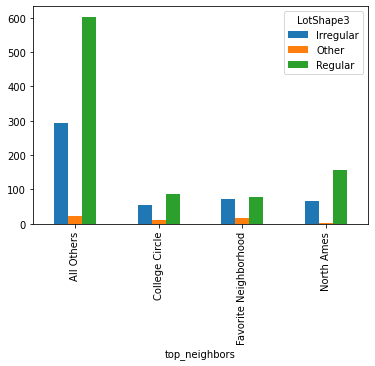

In [0]:
# display that

myresults = pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])
myresults.plot(kind='bar');

In [0]:
iowa.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NormalCondition,LotShape3,top_neighbors
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,yes,Regular,College Circle
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,yes,Regular,All Others
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,yes,Irregular,College Circle
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,no,Irregular,All Others
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,yes,Irregular,All Others


In [0]:
pd.crosstab(iowa['OverallQual'], iowa['top_neighbors'])

top_neighbors,All Others,College Circle,Favorite Neighborhood,North Ames
OverallQual,,,,
1,2,0,0,0
2,3,0,0,0
3,17,0,0,3
4,94,1,1,20
5,253,28,3,113
6,232,24,44,74
7,159,71,77,12
8,108,23,34,3
9,35,3,5,0


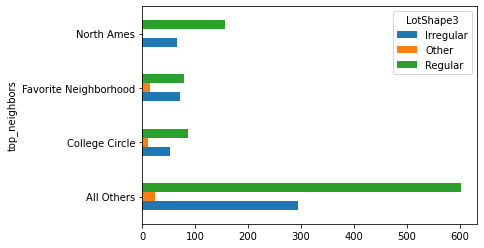

In [0]:
#Flip that

myresults.plot(kind='barh');

In [0]:
#WORKING IN PANDAS

! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-05-11 21:04:30--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.71.0.232, 50.112.20.251, 52.26.240.115
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.71.0.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [        <=>         ]  22.05M  1.95MB/s    in 12s     

2020-05-11 21:04:43 (1.77 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]



In [0]:
! unzip /content/LoanStats_2018Q4.csv.zip

Archive:  /content/LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [0]:
import pandas as pd
df = pd.read_csv('LoanStats_2018Q4.csv')
df.tail(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 22000 22000 22000  60 months   7.84% 444.4  A   A4  Owner                      10+ years MORTGAGE 55000.0 Not Verified    Oct-2018 Current     n   NaN NaN other              Other                   982xx WA  2.18  0   Apr-1987 0   NaN  NaN  8   0   6310    14.3% 21  w   16612.59 16612.59 7545.22         7545.22 5387.41 2157.81 0.0 0.0 0.0 May-2020 0.0     Jul-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   0    159636.0 0   0   0   0   33.0 0       NaN   0   3   5436  14.0 44200 0   0   0   3   19955.0 31090.0 16.9 0   0   128.0 376 17  17  2   17.0  NaN  23.0 NaN  0   2   2   5   9   7   7   12  2   8   0.0 0   0   0   100.0 20.0  0   0   204200.0 6310  37400 0       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN Y   CVD19SKIP INCOMECURT ACTIVE 2.0 0.0 Apr-2020 Jun-2020 Apr-2020 2.0 0.0 ACTIVE 217.07 16717.51 444.4 N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     5000  5000  5000   36 months  16.14% 176.14 C   C4  Oncology Medical Assistant 3 years   MORTGAGE 46400.0 Source Verified Oct-2018 Fully Paid  n   NaN NaN debt_consolidation Debt consolidation      338xx FL  16.85 0   Nov-2003 0   29.0 NaN  10  0   6722    62.2% 18  w   0.0      0.0      5436.0267199262 5436.03 5000.0  436.03  0.0 0.0 0.0 Apr-2019 4550.84 NaN      Jun-2019 0   30.0 1   Individual NaN NaN NaN 0   0    140818.0 0   1   1   1   10.0 13257   89.0  1   5   1287  78.0 10800 2   4   5   6   14082.0 114.0   96.2 0   0   120.0 178 10  10  1   15.0  29.0 10.0 29.0 3   3   5   3   4   3   8   14  5   10  0.0 0   0   2   72.2  100.0 0   0   161585.0 19979 3000  14875   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN       NaN        NaN    NaN NaN NaN      NaN      NaN      NaN NaN NaN    NaN    NaN      NaN   N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     5600  5600  5600   36 months  13.56% 190.21 C   C1  NaN                        NaN       RENT     15600.0 Not Verified    Oct-2018 Current     n   NaN NaN credit_card        Credit card refinancing 836xx ID  15.31 0   Aug-2012 0   NaN  97.0 9   1   5996    34.5% 11  w   3082.01  3082.01  3413.23         3413.23 2517.99 895.24  0.0 0.0 0.0 Apr-2020 190.21  May-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   0    5996.0   0   0   0   1   20.0 0       NaN   0   2   3017  35.0 17400 1   0   0   3   750     4689.0  45.5 0   0   20.0  73  13  13  0   13.0  NaN  20.0 NaN  0   3   5   4   4   1   9   10  5   9   0.0 0   0   0   100.0 25.0  1   0   17400    5996  8600  0       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN       NaN        NaN    NaN NaN NaN      NaN      NaN      NaN NaN NaN    NaN    NaN      NaN   N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     23000 23000 23000  36 months  15.02% 797.53 C   C3  Tax Consultant             10+ years MORTGAGE 75000.0 Source Verified Oct-2018 Charged Off n   NaN NaN debt_consolidation Debt consolidation      352xx AL  20.95 1   Aug-1985 2   22.0 NaN  12  0   22465.0 43.6% 28  w   0.0      0.0      1547.08         1547.08 1025.67 521.41  0.0 0.0 0.0 Dec-2018 797.53  NaN      Nov-2018 0   NaN  1   Individual NaN NaN NaN 0   0    259658.0 4   2   3   3   6.0  18149   86.0  4   6   12843 56.0 51500 2   2   5   11  21638   26321.0 44.1 0   0   12.0  397 4   4   6   5.0   22.0 4.0  22.0 0   4   5   7   14  3   9   19  5   12  0.0 0   0   7   96.4  14.3  0   0   296500.0 40614 47100 21000   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN       NaN        NaN    NaN NaN NaN      NaN      NaN      NaN NaN NaN    NaN    NaN      NaN   N   NaN NaN NaN NaN NaN                                             

In [0]:
pd.read_csv('LoanStats_2018Q4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id                                               member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN                                              NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11     

In [0]:
#Skipeows!!!!!!

df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
df.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Sum null values by column

pd.set_option('display.max_rows', 1000)
df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
settlement_percentage                         127661
settlement_term                               127661
settlement_date                               127661
debt_settlement_flag_date                     127661
settlement_status                             127661
settlement_amount                             127661
sec_app_mths_since_last_major_derog           123258
hardship_loan_status                          117705
hardship_status                               117691
hardship_reason                               117691
hardship_dpd                                  117690
hardship_length                               117690
payment_plan_start_date                       117690
hardship_end_date                             117690
hardship_start_date                           

In [0]:
#Removing NaN columns

df.drop('url', axis=1, inplace=True)


In [0]:
df['int_rate'][3]

' 14.47%'

In [0]:
df['int_rate'].dtype

dtype('O')

In [0]:
# FIXING SINGLE STRING

int_rate = ' 14.47%'

In [0]:
# REMOVE THE SPACE

int_rate.strip()

'14.47%'

In [0]:
# remove percent
int_rate.strip('%')

' 14.47'

In [0]:
int_rate.strip().strip('%')

'14.47'

In [0]:
#### "CAST THE STR VALUE TO FLT"

float('14.47')

14.47

In [0]:
float(int_rate.strip().strip('%'))

14.47

In [0]:
#CHECK WORK
type(float(int_rate.strip().strip('%')))

float

In [0]:
## Write a function that can do what we have written above to any string that is passed to it
#Actually finally understanding this, it blew my mind lol

def myfunc(my_input_value):
    return float(my_input_value.strip().strip('%'))




In [0]:
# TEST IT

type(myfunc(int_rate))

float

In [0]:
#FOR LOOP

new_list = []
for cell in df['int_rate']:
  new_list.append(myfunc(cell))


In [0]:
  new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 12.98, 10.33, 23.4]

In [0]:
df['int_rate_clean']= pd.Series(new_list)

In [0]:
df[['int_rate', 'int_rate_clean']].sample(150)

,int_rate,int_rate_clean
3647,14.47%,14.47
122376,19.92%,19.92
126657,6.11%,6.11
48010,11.80%,11.80
38760,15.02%,15.02
69702,23.40%,23.40
30195,27.27%,27.27
90780,10.47%,10.47
113,13.56%,13.56
3537,8.81%,8.81


In [0]:
df['int_rate_clean'].dtype

dtype('float64')

#There is another way!!!!


In [0]:
##Improve all of this code with the .apply function:

df['int_rate_clean2'] = df['int_rate'].apply(myfunc)

In [0]:
df[['int_rate', 'int_rate_clean', 'int_rate_clean2']].sample(10)

,int_rate,int_rate_clean,int_rate_clean2
91852,8.46%,8.46,8.46
388,14.47%,14.47,14.47
122326,16.14%,16.14,16.14
93199,16.91%,16.91,16.91
63084,25.34%,25.34,25.34
119448,16.91%,16.91,16.91
119513,7.21%,7.21,7.21
10154,18.94%,18.94,18.94
108,15.02%,15.02,15.02
102338,11.06%,11.06,11.06


In [0]:
# look a the top 20 rows 
df['emp_title'].head(20)

0                          Sale Consultant
1                                Educator 
2                    Accounts Examiner III
3                                  teacher
4                           Claims Analyst
5                         Training Manager
6                             Tire builder
7               Program Support Assistant 
8                                   Driver
9                                   BANKER
10                        Business Analyst
11                                OPERATOR
12                        Shift Supervisor
13                                 Driver 
14    Assistant to the Treasurer (Payroll)
15               Reimbursement specialist 
16                       Financial Advisor
17                                Engineer
18                   Sales Account Manager
19                                     Cna
Name: emp_title, dtype: object

In [0]:
# Look at the top 20 employment titles
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [0]:
print(df.shape)
len(df['emp_title'].unique())

(128412, 145)


43893

In [0]:
df['emp_title'].unique()

array(['Sale Consultant', 'Educator ', 'Accounts Examiner III', ...,
       'Oncology Medical Assistant', 'Tax Consultant', 'Payoff Clerk'],
      dtype=object)

In [0]:
import pandas as pd
import numpy as np

In [0]:
df['emp_title'].isnull().sum()

20947

In [0]:
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [0]:
type('Supervisor')

str

In [0]:
isinstance('Supervisor', str)

True

In [0]:
#strip
' supervisor'.title().strip()

'Supervisor'

In [0]:
def clean_title(jobtitle):
  if isinstance(jobtitle, str):
    return (jobtitle.title().strip())
  else: return "Unknown"

In [0]:
clean_title('superViSOR')
clean_title(np.nan)

'Unknown'

In [0]:
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist


['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
#List comprehensions
[clean_title(jobtitle) for jobtitle in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
df['clean_title'] = df['emp_title'].apply(clean_title)

In [0]:
df[['emp_title', 'clean_title']].head()

,emp_title,clean_title
0,Sale Consultant,Sale Consultant
1,Educator,Educator
2,Accounts Examiner III,Accounts Examiner Iii
3,teacher,Teacher
4,Claims Analyst,Claims Analyst


In [0]:
df[['emp_title', 'clean_title']].sample(20)

,emp_title,clean_title
17402,associate,Associate
39898,"Director, Production Planning","Director, Production Planning"
66855,NaN,Unknown
11481,Store Manager,Store Manager
74757,Correctional officer,Correctional Officer
65551,NaN,Unknown
79616,DESIGN/SALES,Design/Sales
99690,Account Executive,Account Executive
121633,NaN,Unknown
16869,Radiologic Technologist,Radiologic Technologist


In [0]:
##### DATES AND TIMES
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_clean',
       'int_rate_clean2', 'clean_title'],
      dtype='object', length=146)

In [0]:
df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [0]:
# as a for loop
mylst = []
for col in df.columns:
  if col.endswith('_d'):
    mylst.append(col)
mylst
  

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
#LIST COMPREHENSION
my_date_cols = [col for col in df.columns if col.endswith('_d')]
my_date_cols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
type(df['issue_d'][0])

str

In [0]:
df['new_issue_d'] = pd.to_datetime(df['issue_d'],  infer_datetime_format=True)

In [0]:
df[['issue_d', 'new_issue_d']].head()

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [0]:
print(df['new_issue_d'].dtype)
df['new_issue_d'].dtype

datetime64[ns]


dtype('<M8[ns]')

In [0]:
df['new_issue_d'].head(1).values

array(['2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
df['year'] = df['new_issue_d'].dt.year
df[['issue_d', 'new_issue_d', 'year']].head()


,issue_d,new_issue_d,year
0,Dec-2018,2018-12-01,2018
1,Dec-2018,2018-12-01,2018
2,Dec-2018,2018-12-01,2018
3,Dec-2018,2018-12-01,2018
4,Dec-2018,2018-12-01,2018


In [0]:
df['month'] = df['new_issue_d'].dt.month
df[['issue_d', 'new_issue_d', 'year', 'month']].head()

,issue_d,new_issue_d,year,month
0,Dec-2018,2018-12-01,2018,12
1,Dec-2018,2018-12-01,2018,12
2,Dec-2018,2018-12-01,2018,12
3,Dec-2018,2018-12-01,2018,12
4,Dec-2018,2018-12-01,2018,12


In [0]:
df['weekday'] = df['new_issue_d'].dt.weekday
df[['issue_d', 'new_issue_d', 'year', 'month', "weekday"]].head(394)

,issue_d,new_issue_d,year,month,weekday
0,Dec-2018,2018-12-01,2018,12,5
1,Dec-2018,2018-12-01,2018,12,5
2,Dec-2018,2018-12-01,2018,12,5
3,Dec-2018,2018-12-01,2018,12,5
4,Dec-2018,2018-12-01,2018,12,5
5,Dec-2018,2018-12-01,2018,12,5
6,Dec-2018,2018-12-01,2018,12,5
7,Dec-2018,2018-12-01,2018,12,5
8,Dec-2018,2018-12-01,2018,12,5
9,Dec-2018,2018-12-01,2018,12,5


In [0]:
df['new_pull'] = pd.to_datetime(df['last_credit_pull_d'])
df['month_pull'] = df['new_pull'].dt.month
df[["last_credit_pull_d", 'new_pull', 'month_pull']].head(40)

,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,12.0
1,Apr-2020,2020-04-01,4.0
2,Feb-2020,2020-02-01,2.0
3,Apr-2020,2020-04-01,4.0
4,Apr-2020,2020-04-01,4.0
5,Apr-2020,2020-04-01,4.0
6,Apr-2020,2020-04-01,4.0
7,Apr-2020,2020-04-01,4.0
8,Apr-2020,2020-04-01,4.0
9,Dec-2019,2019-12-01,12.0


In [0]:
#Date arithmetic
df['day_diff'] = df['new_issue_d'] - df['new_pull']

In [0]:
df[['last_credit_pull_d', 'new_pull', 'day_diff']].head()


,last_credit_pull_d,new_pull,day_diff
0,Dec-2019,2019-12-01,-365 days
1,Apr-2020,2020-04-01,-487 days
2,Feb-2020,2020-02-01,-427 days
3,Apr-2020,2020-04-01,-487 days
4,Apr-2020,2020-04-01,-487 days


In [0]:
df['day_diff'].value_counts().sort_index().tail()

-30 days     87
0 days      475
30 days      73
31 days      33
61 days       1
Name: day_diff, dtype: int64

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-11 21:05:57--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.24.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.24.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  69.3MB/s    in 2.8s    

2020-05-11 21:06:00 (69.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
# pd.read_csv('instacart_online_grocery_shopping_2017_05_01.tar.gz')
# ! WGET instacart_online_grocery_shopping_2017_05_01.tar.gz.unzip

In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
insta = pd.read_csv('products.csv')

In [0]:
insta.sample(5)

,product_id,product_name,aisle_id,department_id
11863,11864,Beeswax Cake Candle - 3,101,17
19246,19247,Moisturizing Cream For Dry Sensitive Skin,127,11
22476,22477,Family Size Sour Cream & Onion Flavored Potato...,107,19
6361,6362,Sea Algae Serum,109,11
24123,24124,Green Vibrance,47,11


In [0]:
insta.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
insta.tail(5)

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [0]:
insta.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [0]:
insta.shape

(49688, 4)

In [0]:
insta.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [0]:
pd.set_option('display.max_rows', 100000)
insta.dtypes


product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [0]:
import numpy as np

In [0]:
insta.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [0]:
insta.dropna(inplace=True)

In [0]:
insta.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [0]:
insta['product_id'].value_counts()

2047     1
44351    1
48477    1
46428    1
36187    1
34138    1
40281    1
38232    1
11599    1
9550     1
15693    1
13644    1
3403     1
1354     1
7497     1
5448     1
27975    1
25926    1
32069    1
30020    1
19779    1
17730    1
23873    1
42334    1
44383    1
21856    1
13676    1
48509    1
46460    1
36219    1
34170    1
40313    1
38264    1
11631    1
9582     1
15725    1
3435     1
23905    1
1386     1
7529     1
5480     1
28007    1
25958    1
32101    1
30052    1
19811    1
17762    1
21824    1
42302    1
30724    1
48445    1
46364    1
36123    1
34074    1
40217    1
38168    1
11535    1
9486     1
15629    1
13580    1
3339     1
1290     1
7433     1
5384     1
27911    1
25862    1
32005    1
29956    1
19715    1
17666    1
23809    1
21760    1
48413    1
42270    1
44319    1
3371     1
46396    1
36155    1
34106    1
40249    1
38200    1
11567    1
9518     1
15661    1
13612    1
1322     1
21792    1
7465     1
5416     1
27943    1
25894    1

In [0]:
insta = pd.read_csv('products.csv')
insta.head(20)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7
